In [1]:
# -*- coding: utf-8 -*-

import numpy as np
import pandas as pd
from fxdayu_alphaman.factor.factor import Factor

class Factor_Volume001(Factor):

    c = 6

    def calculate_volume001(self, data):
        # 逐支股票计算volume003因子
        candle_data = data[1].dropna()
        if len(candle_data) == 0:
            return
        high = candle_data["high"]
        volume = candle_data["volume"]
        adv_s = self.ts_mean(volume, 10)
        factor_volume001 = - self.correlation(high, adv_s, self.c) #计算因子值
        factor_volume001.index = candle_data.index
        factor_volume001 = pd.DataFrame(factor_volume001)
        factor_volume001.columns = [data[0],]
        return  factor_volume001

    def factor_calculator(self, pn_data):
        # volume001
        factor_volume001 = map(self.calculate_volume001, pn_data.iteritems())
        factor_volume001 = pd.concat(factor_volume001, axis=1)
        factor_volume001 = self.winsorize(factor_volume001) #去极值
        factor_volume001 = self.standardize(factor_volume001) #标准化
#         factor_volume001 = self.neutralize(factor_volume001, factorIsMV=False) #行业、市值中性化
        factor_volume001 = self.factor_df_to_factor_mi(factor_volume001) #格式标准化
#         factor_volume001 = self.get_factor_by_rankScore(factor_volume001, ascending=True) # 将因子用排序分值重构，并处理到0-1之间(默认为升序——因子越大 排序分值越大(越好)
                                                                                          # 具体根据因子对收益的相关关系而定，为正则应用升序,为负用降序)
        return factor_volume001

class Factor_Volume003(Factor):

    d = 7
    s = 8
    c = 14

    def calculate_volume003(self, data):
        # 逐支股票计算volume003因子
        candle_data = data[1].dropna()
        if len(candle_data) == 0:
            return
        high = candle_data["high"]
        volume = candle_data["volume"]
        #核心算法
        factor_volume003 = - self.correlation(self.slope(high, self.s), self.slope(self.delta(np.log(volume), self.d), self.s),self.c) #计算因子值
        factor_volume003.index = candle_data.index
        factor_volume003 = pd.DataFrame(factor_volume003)
        factor_volume003.columns = [data[0],]
        return  factor_volume003

    def factor_calculator(self, pn_data):
        # volume003

        factor_volume003 = map(self.calculate_volume003, pn_data.iteritems())
        factor_volume003 = pd.concat(factor_volume003, axis=1)
        # factor_volume003 = self.winsorize(factor_volume003) #去极值
        # factor_volume003 = self.standardize(factor_volume003) #标准化
        # factor_volume003 = self.neutralize(factor_volume003, factorIsMV=False) #行业、市值中性化
        factor_volume003 = self.factor_df_to_factor_mi(factor_volume003) #格式标准化
        factor_volume003 = self.get_factor_by_rankScore(factor_volume003, ascending=True) # 将因子用排序分值重构，并处理到0-1之间(默认为升序——因子越大 排序分值越大(越好)
                                                                                          # 具体根据因子对收益的相关关系而定，为正则应用升序,为负用降序)
        return factor_volume003

In [2]:
from datetime import datetime
from fxdayu_data import DataAPI
from fxdayu_alphaman.factor.utility import standard_code_style
from fxdayu_alphaman.factor.admin import Admin
import tushare as ts

#初始选股范围设置
def coder(code):
    if code.startswith('6'):
        return code + '.XSHG'
    elif code.startswith('0') or code.startswith('3'):
        return code + '.XSHE'
    else:
        return code

name = ts.get_hs300s()
name_list = list(name.code)
codes = tuple(map(coder, name_list))
print(codes)

('002230.XSHE', '002299.XSHE', '601225.XSHG', '002174.XSHE', '601727.XSHG', '600019.XSHG', '601127.XSHG', '002385.XSHE', '601216.XSHG', '300070.XSHE', '000709.XSHE', '002074.XSHE', '600074.XSHG', '000983.XSHE', '300133.XSHE', '300072.XSHE', '601118.XSHG', '300059.XSHE', '000826.XSHE', '300144.XSHE', '600867.XSHG', '300024.XSHE', '002131.XSHE', '002152.XSHE', '600188.XSHG', '600010.XSHG', '600009.XSHG', '000792.XSHE', '300002.XSHE', '600048.XSHG', '002739.XSHE', '300017.XSHE', '300033.XSHE', '000778.XSHE', '600271.XSHG', '300058.XSHE', '601258.XSHG', '601600.XSHG', '300251.XSHE', '000060.XSHE', '600383.XSHG', '600875.XSHG', '002146.XSHE', '600111.XSHG', '600256.XSHG', '601933.XSHG', '600873.XSHG', '600446.XSHG', '300027.XSHE', '000027.XSHE', '000425.XSHE', '600583.XSHG', '300168.XSHE', '002153.XSHE', '601021.XSHG', '000977.XSHE', '000555.XSHE', '000402.XSHE', '002183.XSHE', '600352.XSHG', '600157.XSHG', '000876.XSHE', '600582.XSHG', '601611.XSHG', '000800.XSHE', '000630.XSHE', '600718.X

In [3]:
# 测试参数设置
start = datetime(2015, 1, 1)
end = datetime(2017, 4, 18, 15)
periods = (1, 5, 10)

data_config={"freq": "D", "api": "candle", "adjust":"after"}
DataAPI.set_file('D:/PycharmProjects/Selector/examples/work_space/config.py')

# 获取数据
PN = DataAPI.factor(codes, ('high','close', 'volume'), start=start, end=end)
prices = PN.minor_xs('close')
print PN
print prices

<class 'pandas.core.panel.Panel'>
Dimensions: 300 (items) x 557 (major_axis) x 3 (minor_axis)
Items axis: 000001.XSHE to 603993.XSHG
Major_axis axis: 2015-01-05 15:00:00 to 2017-04-18 15:00:00
Minor_axis axis: close to volume
                     000001.XSHE  000002.XSHE  000008.XSHE  000009.XSHE  \
datetime                                                                  
2015-01-05 15:00:00       10.867       13.844        4.984          NaN   
2015-01-06 15:00:00       10.704       13.333        5.014          NaN   
2015-01-07 15:00:00       10.500       13.213        5.129        9.810   
2015-01-08 15:00:00       10.148       12.619        5.292        9.824   
2015-01-09 15:00:00       10.229       12.489        5.322        9.552   
2015-01-12 15:00:00       10.019       12.182        5.402        9.420   
2015-01-13 15:00:00        9.958       12.136        5.501        9.729   
2015-01-14 15:00:00       10.046       12.164        5.402        9.684   
2015-01-15 15:00:00     

In [5]:
def manage_factors_value_test(factor_name_list,data_config_dict):
    # admin测试 -获得多个因子结果
    factor_admin = Admin(*factor_name_list)
    result = factor_admin.get_all_factors_value(codes,start,end,all_Factors_dict=factor_dict,
                                                all_factors_data_config_dict=data_config_dict
                                                )

    return(factor_admin , result)

#######################################################

#确定要载入的因子名称
factor_name_list = ["Factor_Volume003", "Factor_Volume001"]
#确定因子的类
factor_dict = {"Factor_Volume001": Factor_Volume001(),"Factor_Volume003": Factor_Volume003()}

#逐个配置因子需要的数据类型
data_config_dict = {"Factor_Volume003":data_config,"Factor_Volume001":data_config}

# admin测试 -获得多个因子结果
factor_admin , result = manage_factors_value_test(factor_name_list,data_config_dict)

D:\ProgramData\Anaconda2\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


In [6]:
#######################################
factor_name_list,factor_value_list = result.keys(),result.values()

In [7]:
# 因子加权合成

# 1)　计算因子ｉｃ序列
ic_df = factor_admin.get_factors_ic_df(factor_name_list,factor_value_list,codes,start,end,periods=(1,5,10),quantiles=5,price=prices)
# 2) 计算因子权重
holding_period = 10
ic_weight_df = factor_admin.get_ic_weight_df(ic_df[holding_period],holding_period,rollback_period=30)


# 3)计算加权合成的因子
new_factor = factor_admin.ic_cov_weighted_factor(factor_name_list,factor_value_list,ic_weight_df)
print new_factor

# 4)查看合成的因子表现
perf = factor_admin.calculate_performance(new_factor.name,new_factor.multifactor_value,start,end,periods = (1,5,10),quantiles=5,price = prices)
print(perf.mean_ic)

           0
1   0.008831
5   0.017836
10  0.031734


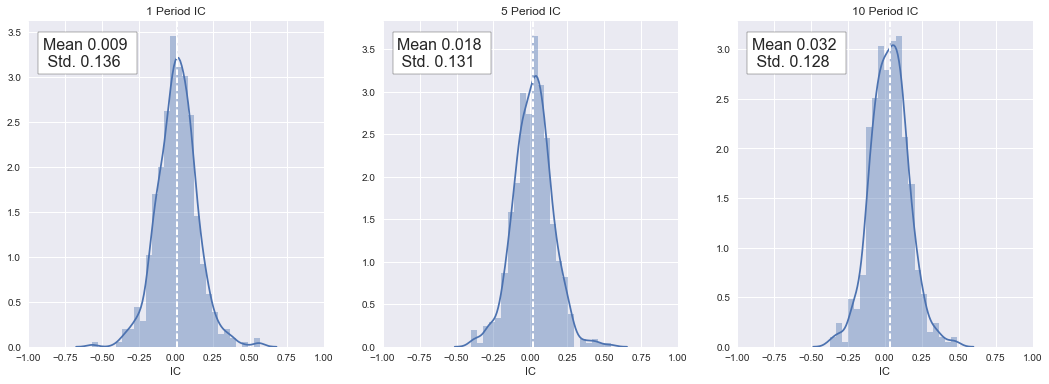

D:\ProgramData\Anaconda2\lib\site-packages\alphalens\plotting.py:215: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=22,center=False).mean()
  pd.rolling_mean(ic, 22).plot(ax=a,


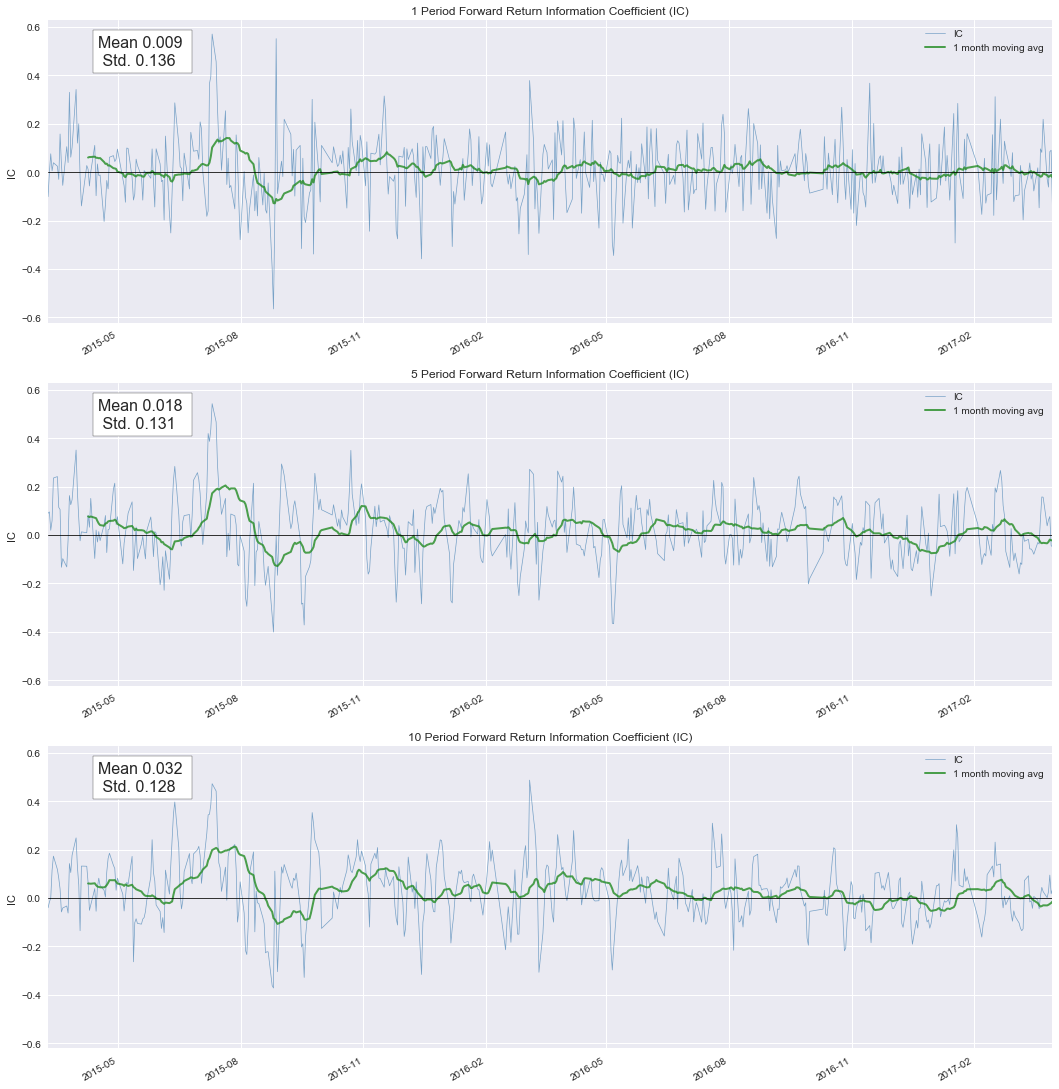

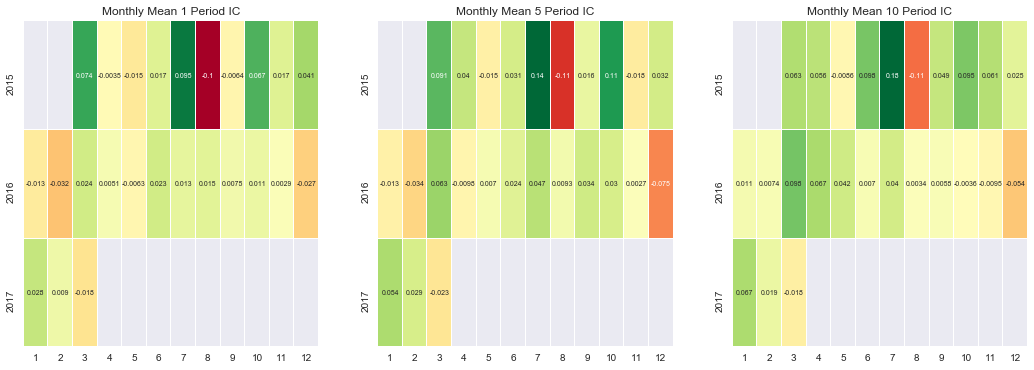

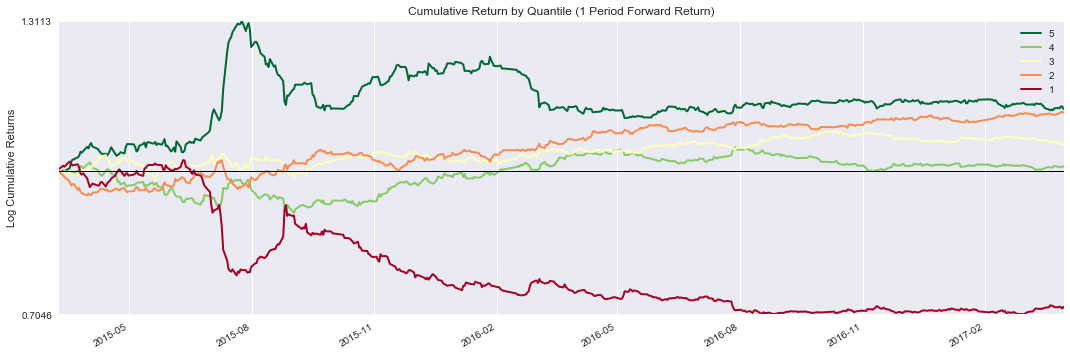

D:\ProgramData\Anaconda2\lib\site-packages\alphalens\plotting.py:767: FutureWarning: pd.rolling_apply is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(center=False,min_periods=1,window=5).apply(args=<tuple>,func=<function>,kwargs=<dict>)
  min_periods=1, args=(period,))


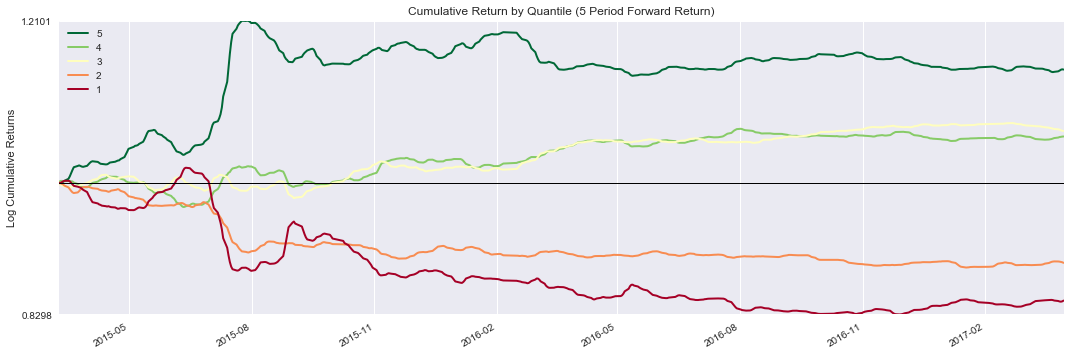

D:\ProgramData\Anaconda2\lib\site-packages\alphalens\plotting.py:767: FutureWarning: pd.rolling_apply is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(center=False,min_periods=1,window=10).apply(args=<tuple>,func=<function>,kwargs=<dict>)
  min_periods=1, args=(period,))


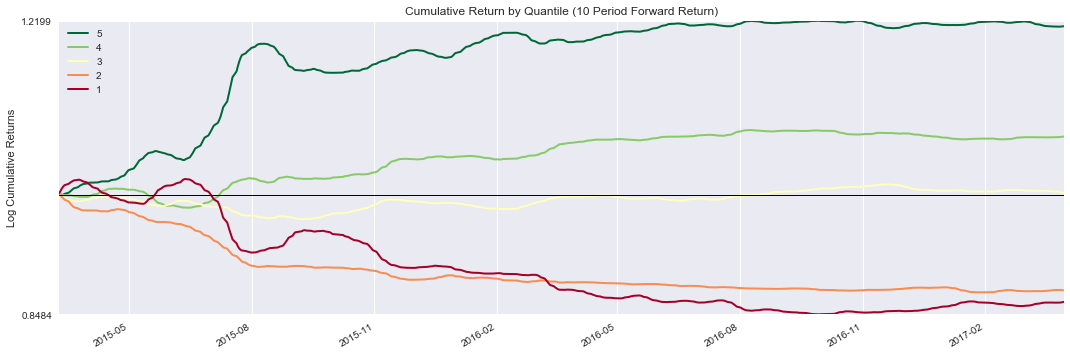

In [9]:
from alphalens import plotting
import matplotlib.pyplot as plt
plotting.plot_ic_hist(perf.ic)
plt.show()
plotting.plot_ic_ts(perf.ic)
plt.show()
plotting.plot_monthly_ic_heatmap(perf.mean_ic_by_M)
plt.show()

# 按quantile画出累积持有收益
for i in [1, 5, 10]:
    plotting.plot_cumulative_returns_by_quantile(perf.mean_return_by_q, period=i)
    plt.show()

In [12]:
# new_factor.multifactor_value.unstack()
import alphalens
factor_data = alphalens.utils.get_clean_factor_and_forward_returns(new_factor.multifactor_value, prices, quantiles=5)

cond = factor_data['factor_quantile'] == 5
Q5 = factor_data[cond]
stocks = pd.Series(True, index=Q5.index)
stocks = stocks.unstack()
stocks[stocks != True] = False
print(stocks)

asset               000001.XSHE 000002.XSHE 000008.XSHE 000009.XSHE  \
date                                                                  
2015-03-09 15:00:00       False        True       False       False   
2015-03-10 15:00:00       False        True       False       False   
2015-03-11 15:00:00       False       False       False       False   
2015-03-12 15:00:00       False       False       False       False   
2015-03-13 15:00:00       False       False       False       False   
2015-03-16 15:00:00       False        True       False       False   
2015-03-17 15:00:00       False        True       False       False   
2015-03-18 15:00:00       False       False       False       False   
2015-03-19 15:00:00       False       False       False        True   
2015-03-20 15:00:00        True       False       False        True   
2015-03-23 15:00:00        True       False       False        True   
2015-03-24 15:00:00        True       False       False        True   
2015-0